In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manikondaanirudh","key":"3e0d10f43b4cda576988ecc284404e15"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d iroldan/real-doppler-raddar-database

 80% 51.0M/63.6M [00:00<00:00, 75.9MB/s]
100% 63.6M/63.6M [00:00<00:00, 100MB/s] 


In [ ]:
! unzip real-doppler-raddar-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/People/11-23f/015.csv  
  inflating: data/People/11-23f/016.csv  
  inflating: data/People/11-23f/017.csv  
  inflating: data/People/11-23f/018.csv  
  inflating: data/People/11-23f/019.csv  
  inflating: data/People/11-23f/020.csv  
  inflating: data/People/11-23f/021.csv  
  inflating: data/People/11-23f/022.csv  
  inflating: data/People/11-23f/023.csv  
  inflating: data/People/11-23f/024.csv  
  inflating: data/People/11-23f/025.csv  
  inflating: data/People/11-23f/026.csv  
  inflating: data/People/11-23f/027.csv  
  inflating: data/People/11-23f/028.csv  
  inflating: data/People/11-23f/029.csv  
  inflating: data/People/11-23f/030.csv  
  inflating: data/People/11-23f/031.csv  
  inflating: data/People/11-23f/032.csv  
  inflating: data/People/11-23f/033.csv  
  inflating: data/People/11-23f/034.csv  
  inflating: data/People/11-23f/035.csv  
  inflating: data/People/11-23f/036.csv  
  inflating: data/People/

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import  tensorflow as tf
import tensorflow.keras as k
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt 
import pickle
import os 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [ ]:
car=[]
x=[]
y=[]
file=os.listdir('Cars/')
print(file)
for i in file:
    f=os.listdir('Cars/'+i)
    for j in f:
        p=pd.read_csv("Cars/"+i+"/"+j,header=None)
        p=p.to_numpy()
        car.append(p)
        x.append(p)
        d=[1,0,0]
        y.append(d)
print("done car")
drone=[]
file=os.listdir('Drones/')
for i in file:
    f=os.listdir('Drones/'+i)
    for j in f:
        p=pd.read_csv("Drones/"+i+"/"+j,header=None)
        p=p.to_numpy()
        drone.append(p)
        x.append(p)
        d=[0,1,0]
        y.append(d)
print("done drone")        
people=[]
file=os.listdir('People/')
for i in file:
    f=os.listdir('People/'+i)
    for j in f:
        p=pd.read_csv("People/"+i+"/"+j,header=None)
        p=p.to_numpy()
        people.append(p)
        x.append(p)
        d=[0,0,1]
        y.append(d)
print("done people")

['13-23', '15-48', '13-13p', '17-09p', '13-54', '13-19', '15-37', '13-49p', '16-01p', '17-09', '13-44', '15-55m', '13-49', '15-42', '15-55p', '15-55a', '13-13', '13-23p', '13-38', '16-01', '15-48p', '15-55', '16-07p', '15-42p', '13-29', '15-37p', '16-07']
done car
done drone
done people


In [ ]:
r=np.save('input',x)

In [ ]:
s=np.save('ground tooth',y)

In [ ]:
x=np.absolute(x)

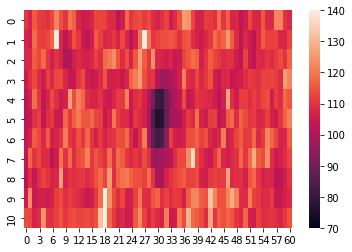

In [ ]:
car=np.asarray(car)
np.shape(car)
car=np.absolute(car)
drone=np.absolute(drone)
people=np.absolute(people)
import seaborn as sns
ax = sns.heatmap(car[600],vmin=70,vmax=140)

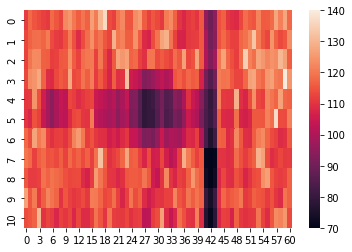

In [ ]:
ay=sns.heatmap(people[500],vmin=70,vmax=140)

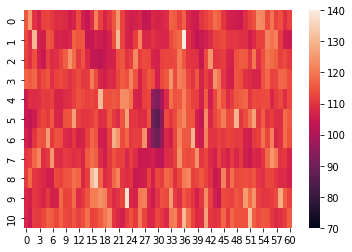

In [ ]:
ay=sns.heatmap(drone[500],vmin=70,vmax=140)

In [ ]:
np.shape(x)

(17485, 11, 61)

In [ ]:
np.shape(y)

(17485, 3)

In [ ]:
 from sklearn.model_selection import train_test_split 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.35)

In [ ]:
count=0
for i in range(len(y_train)):
  if(y_train[i][0]==1):
    count=count+1
print(count)

3714


In [ ]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
x_train=np.reshape(x_train,[-1,11,61,1])
x_test=np.reshape(x_test,[-1,11,61,1])
num_classes=y_test.shape[1]

In [ ]:
model=k.Sequential()
model.add(tf.keras.Input(shape=(11,61,1)))
model.add(k.layers.Conv2D(32,3,3,padding='valid',
    dilation_rate=(1, 1),
    activation="relu"))
model.add(k.layers.Flatten())
model.add(k.layers.Dense(64,activation="relu"))
model.add(k.layers.Dense(64,activation="relu")) 
model.add(k.layers.Dense(64,activation="relu"))
model.add(k.layers.Dense(3,activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 20, 32)         320       
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 64)                122944    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 131,779
Trainable params: 131,779
Non-trai

In [ ]:
datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=True,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=32)

Epoch 1/50
356/356 [==============================] - 16s 7ms/step - loss: 0.9366 - accuracy: 0.6019 - val_loss: 0.5435 - val_accuracy: 0.7139
Epoch 2/50
356/356 [==============================] - 2s 7ms/step - loss: 0.4329 - accuracy: 0.8259 - val_loss: 0.5985 - val_accuracy: 0.7819
Epoch 3/50
356/356 [==============================] - 2s 6ms/step - loss: 0.3605 - accuracy: 0.8570 - val_loss: 0.3287 - val_accuracy: 0.8694
Epoch 4/50
356/356 [==============================] - 2s 7ms/step - loss: 0.3469 - accuracy: 0.8618 - val_loss: 0.4160 - val_accuracy: 0.8402
Epoch 5/50
356/356 [==============================] - 2s 7ms/step - loss: 0.3329 - accuracy: 0.8674 - val_loss: 0.3213 - val_accuracy: 0.8696
Epoch 6/50
356/356 [==============================] - 2s 7ms/step - loss: 0.3115 - accuracy: 0.8748 - val_loss: 0.3224 - val_accuracy: 0.8704
Epoch 7/50
356/356 [==============================] - 2s 7ms/step - loss: 0.3225 - accuracy: 0.8737 - val_loss: 0.3247 - val_accuracy: 0.8657
Epoch

In [ ]:
# history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=16)

In [ ]:
y_pred=history.model.predict(x_test)

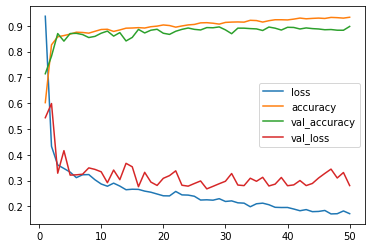

In [ ]:
plt.plot(range(1,51),history.history['loss'])

plt.plot(range(1,51),history.history['accuracy'])
plt.plot(range(1,51),history.history['val_accuracy'])
plt.plot(range(1,51),history.history['val_loss'])
plt.legend(['loss','accuracy','val_accuracy','val_loss'])
plt.show()

In [ ]:
y_pred=history.model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
predictions = model.predict(x_test)

In [ ]:

y_pred=np.argmax(predictions, axis=1)
y_test1=np.argmax(y_test, axis=1)

# y_pred=to_categorical(y_pred)
print(y_pred)
cm = confusion_matrix(y_test1, y_pred)

[2 2 0 ... 1 2 1]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


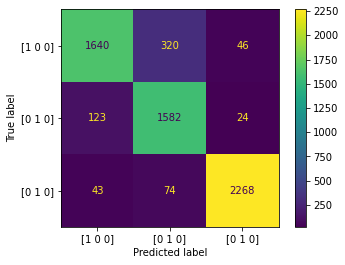

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=y_train)
disp.plot()
plt.show()

In [ ]:
def predict(x):
    x=np.reshape(x,[-1,11,61,1])
    z=history.model.predict(x)
    z=z.round()
    
    return z

In [ ]:
history.model.evaluate(x_test,y_test)

192/192 [==============================] - 1s 4ms/step - loss: 0.2807 - accuracy: 0.8971


[0.28066983819007874, 0.8970588445663452]

In [ ]:
history.model.predict(x_test)

array([[7.0114045e-12, 2.1879150e-12, 1.0000000e+00],
       [9.7299466e-04, 4.5073123e-04, 9.9857628e-01],
       [9.9592066e-01, 4.0610740e-03, 1.8292880e-05],
       ...,
       [3.1978881e-01, 6.4461684e-01, 3.5594389e-02],
       [1.1512110e-10, 2.7241820e-12, 1.0000000e+00],
       [4.2307018e-03, 9.9556327e-01, 2.0606487e-04]], dtype=float32)

In [ ]:
y_pred=predict(x_test)

In [ ]:
for i in range(len(y_pred)):
    c=0
    if y_pred[i].any()!=y_test[i].any():
        c=c+1
c/len(y_test)

0.0

In [ ]:
!ls

 Cars	 'ground tooth.npy'   People
 data	  input.npy	      real-doppler-raddar-database.zip
 Drones   kaggle.json	      sample_data


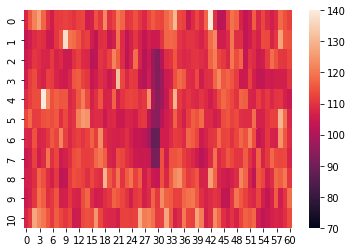

In [ ]:
ay=sns.heatmap(x[100],vmin=70,vmax=140)


In [ ]:
pred=history.model.predict(np.reshape(x[100],[1,11,61,1]))

In [ ]:
pred.round()

array([[1., 0., 0.]], dtype=float32)

In [ ]:
y[100]

[1, 0, 0]